### Table of contents:

* [4. Topic modeling](#chapter4)
    * [4.1 Requirements](#section_4_1)
    * [4.2 Imports](#section_4_2)
    * [4.3 Get data](#section_4_3)
    * [4.4 With top2vec](#section_4_4)
    * [4.5 With Latent Dirichlet Allocation (LDA)](#section_4_5)

# 4. Topic modeling <a class="anchor" id="chapter4"></a>

Topic modeling is a machine learning technique (unsupervised) that automatically analyzes text data to determine cluster words (mapped to topics) for a set of documents.

Two algorithms were used:

- Top2Vec is an algorithm for topic modeling and semantic search. It automatically detects topics present in text and generates jointly embedded topic, document and word vectors. Some benefits: automatically finds number of topics, works on short text, doesn't ingore semantics.
- LDA groups texts based on the words they contain and the probability of a word belonging to a certain topic. The LDA algorithm outputs the topic word distribution. It's the most popular topic modeling algorithm but: needs pre-processing (maybe multiple rounds), needs to known the number of topics and ignores semantics.

After some experiments, it was found that the top2vec algorithm works much better in this dataset. 

Note: execute with GPU.

References: 1.https://github.com/ddangelov/Top2Vec 2. https://radimrehurek.com/gensim/models/ldamulticore.html

## 4.1 Requirements <a class="anchor" id="section_4_1"></a>

In [ ]:
pip install gensim==3.8.3

In [ ]:
pip install top2vec

In [3]:
#pip install pyLDAvis

## 4.2 Imports <a class="anchor" id="section_4_2"></a>

In [1]:
import numpy as np
import pandas as pd

from top2vec import Top2Vec

import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
from wordcloud import WordCloud

2022-05-12 15:07:15.965338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-12 15:07:15.965411: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 4.3 Get data <a class="anchor" id="section_4_3"></a>

In [2]:
# top2vec doesn't need pre-processing, but we will still use the already cleaned dataset

data = pd.read_pickle('data_preprocessed_tm.pkl')
data.insert(0, 'ID', range(0, len(data)))
data.head()

ID  label                                            content
0   0      0  prisão perpétua homem tentou assassinar senado...
1   1      0  john nash matemático mente brilhante morre aci...
2   2      1  mito reeleição mínima garantida cavaco sairá d...
3   3      0  morreu rita levintalcini grande dama ciência i...
4   4      0  trás porta amarela homem problemas psicológico...

In [3]:
# Create mapping index-document ID

ids = {}
for index in data.index:
  ids[index] = data.iloc[index].ID

In [4]:
content = data.loc[:,'content']
content.head()

0    prisão perpétua homem tentou assassinar senado...
1    john nash matemático mente brilhante morre aci...
2    mito reeleição mínima garantida cavaco sairá d...
3    morreu rita levintalcini grande dama ciência i...
4    trás porta amarela homem problemas psicológico...
Name: content, dtype: object

## 4.4 With top2vec <a class="anchor" id="section_4_4"></a>

In [6]:
# Convert dataset to list of strings

documents = list(content.values.flatten())

In [7]:
# Train a Top2Vec model on our news dataset

model = Top2Vec(documents, speed="learn", workers=8)

2022-05-11 20:09:32,399 - top2vec - INFO - Pre-processing documents for training
2022-05-11 20:09:34,121 - top2vec - INFO - Creating joint document/word embedding
2022-05-11 20:09:51,672 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-05-11 20:10:02,651 - top2vec - INFO - Finding dense areas of documents
2022-05-11 20:10:02,691 - top2vec - INFO - Finding topics


In [8]:
# Total number of topics found

total_topics = model.get_num_topics()

print("Found: "+str(total_topics)+" topics.")

Found: 10 topics.


In [9]:
# For each topic, the top 50 words are returned, in order of semantic similarity to the topic

topic_words, word_scores, topic_nums = model.get_topics(total_topics)

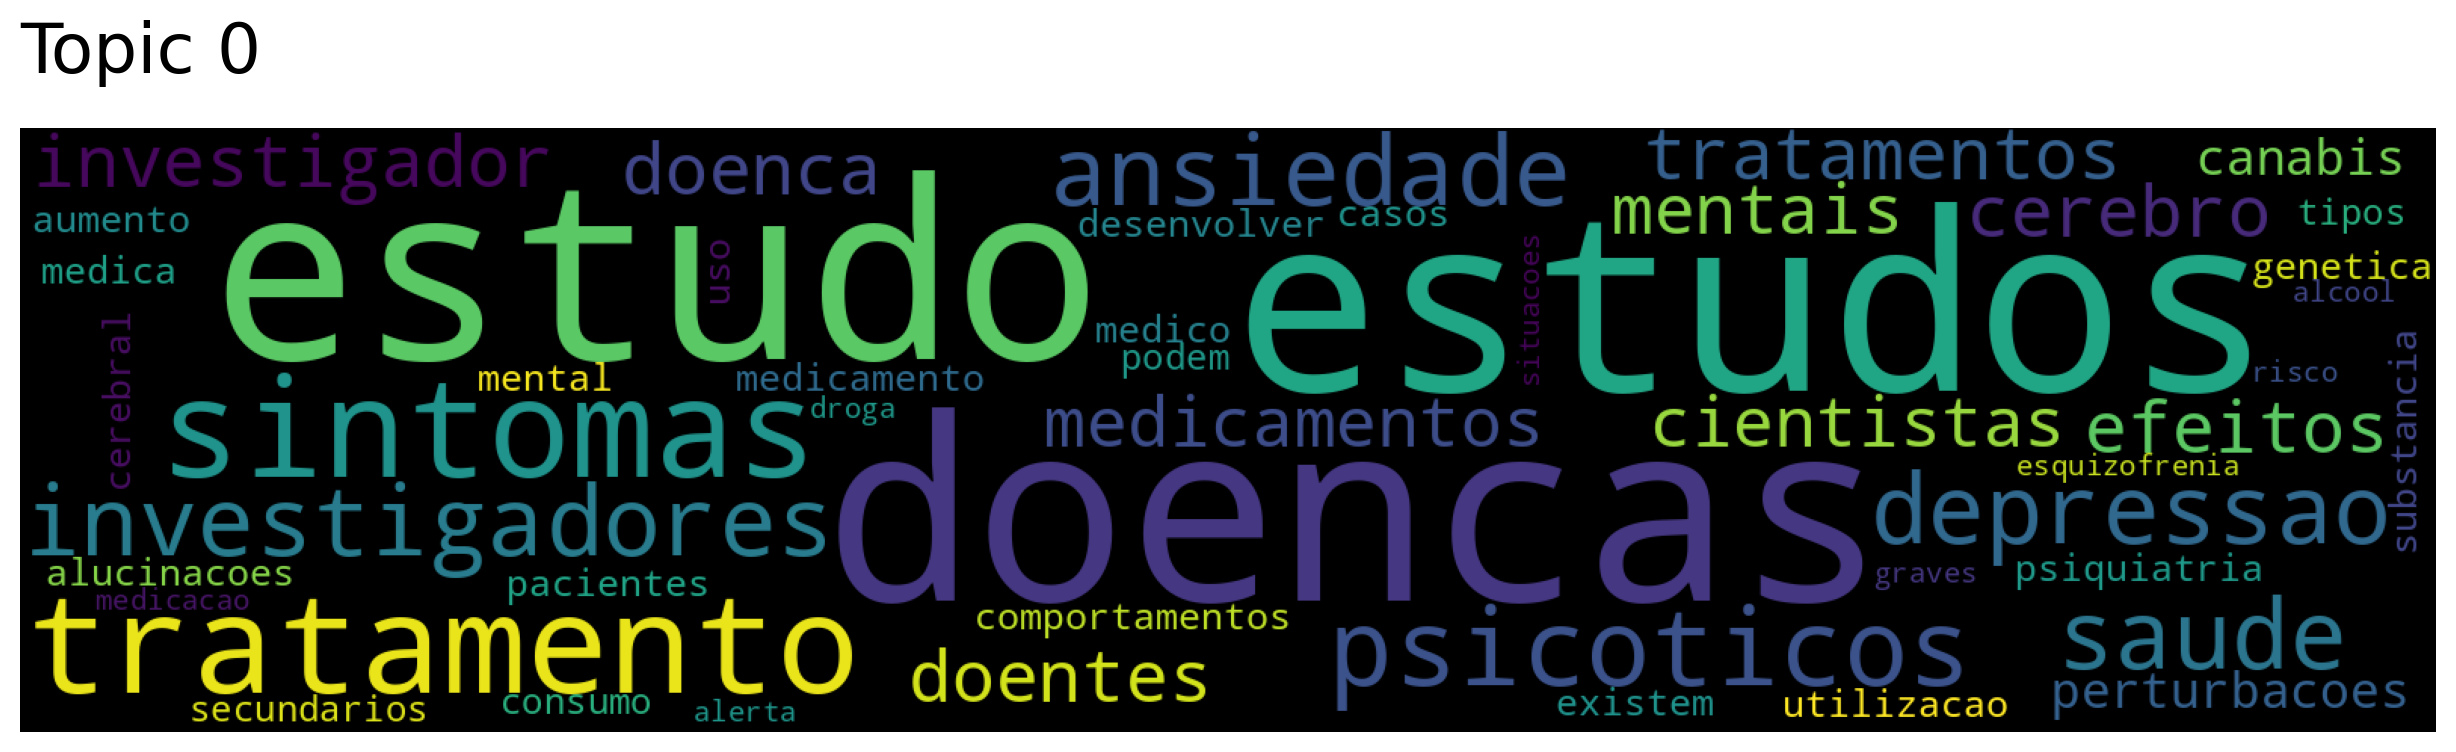

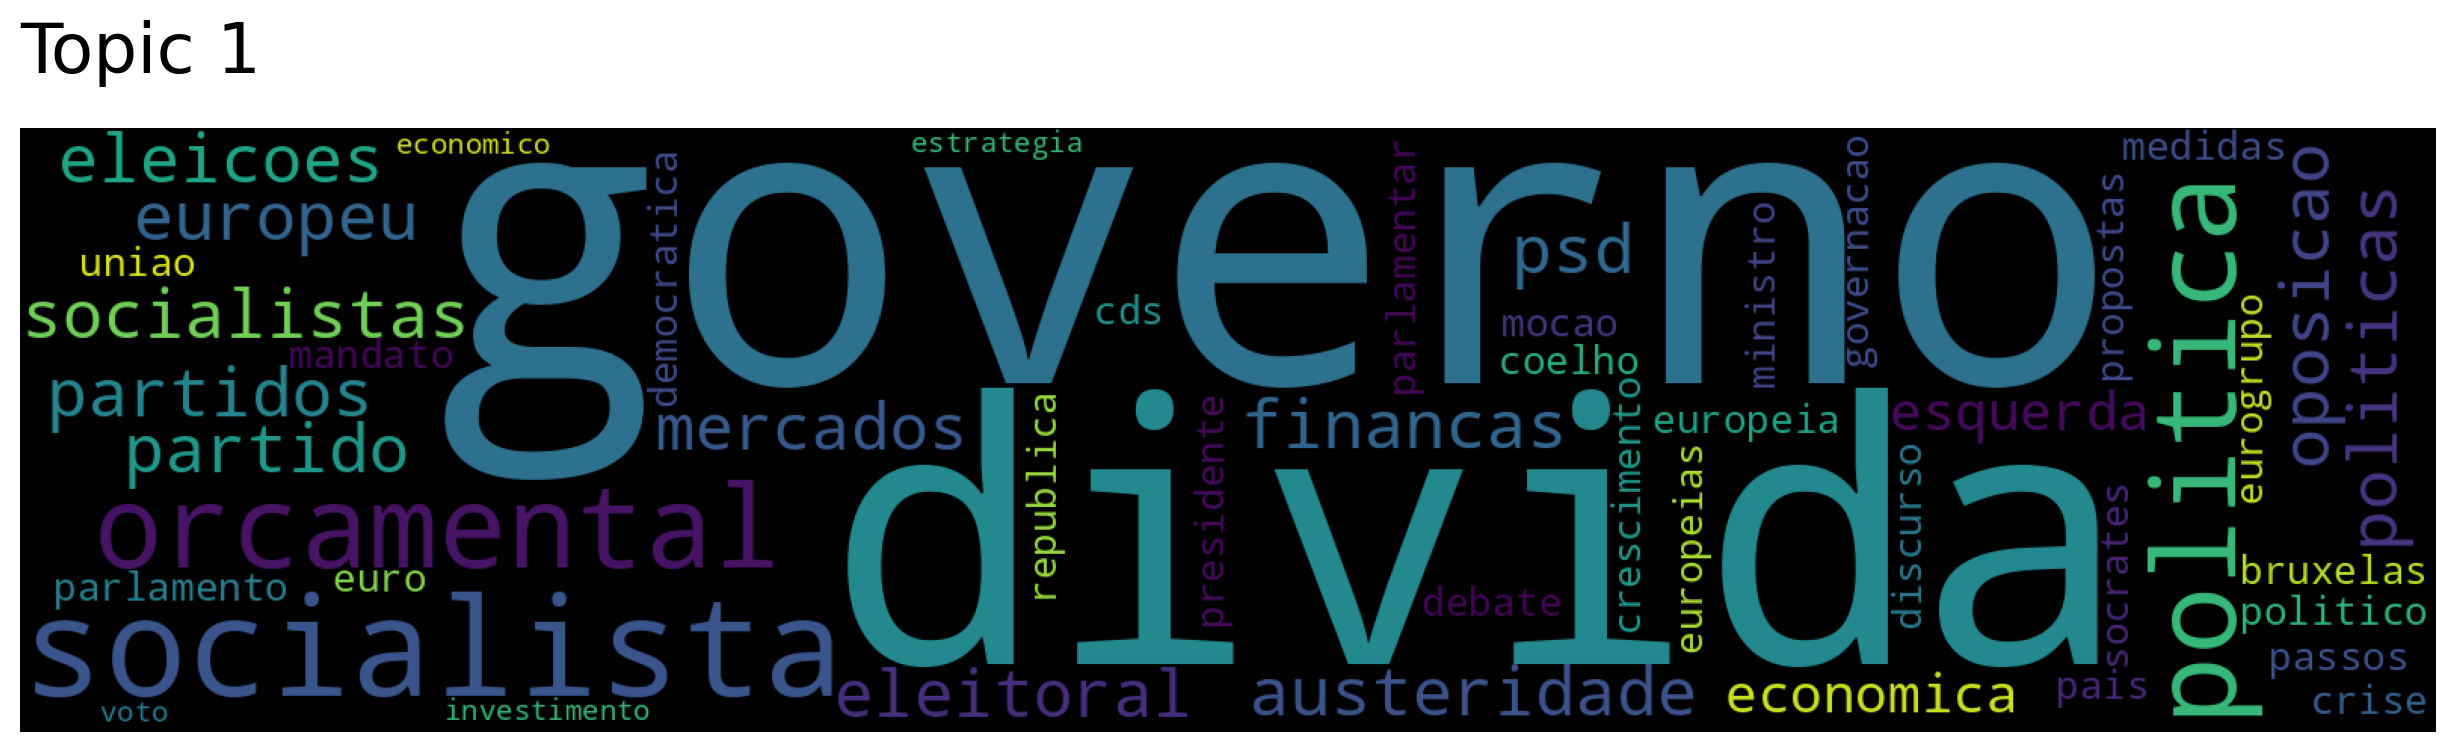

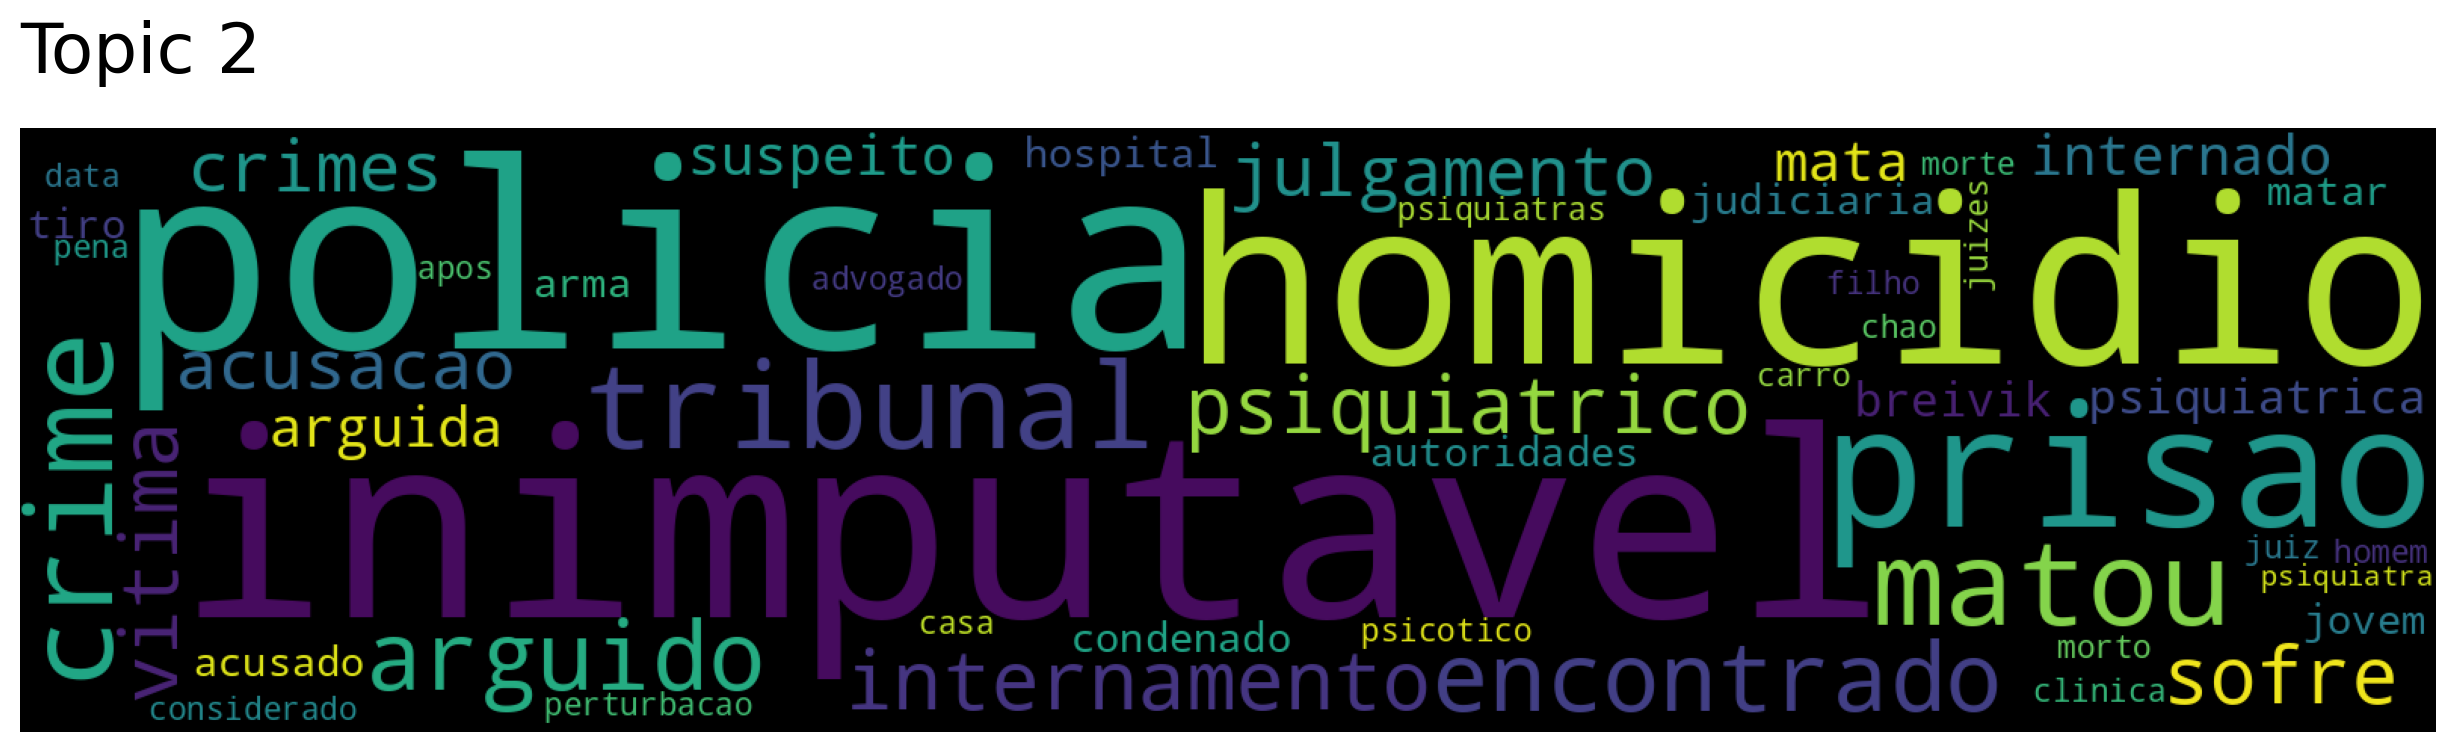

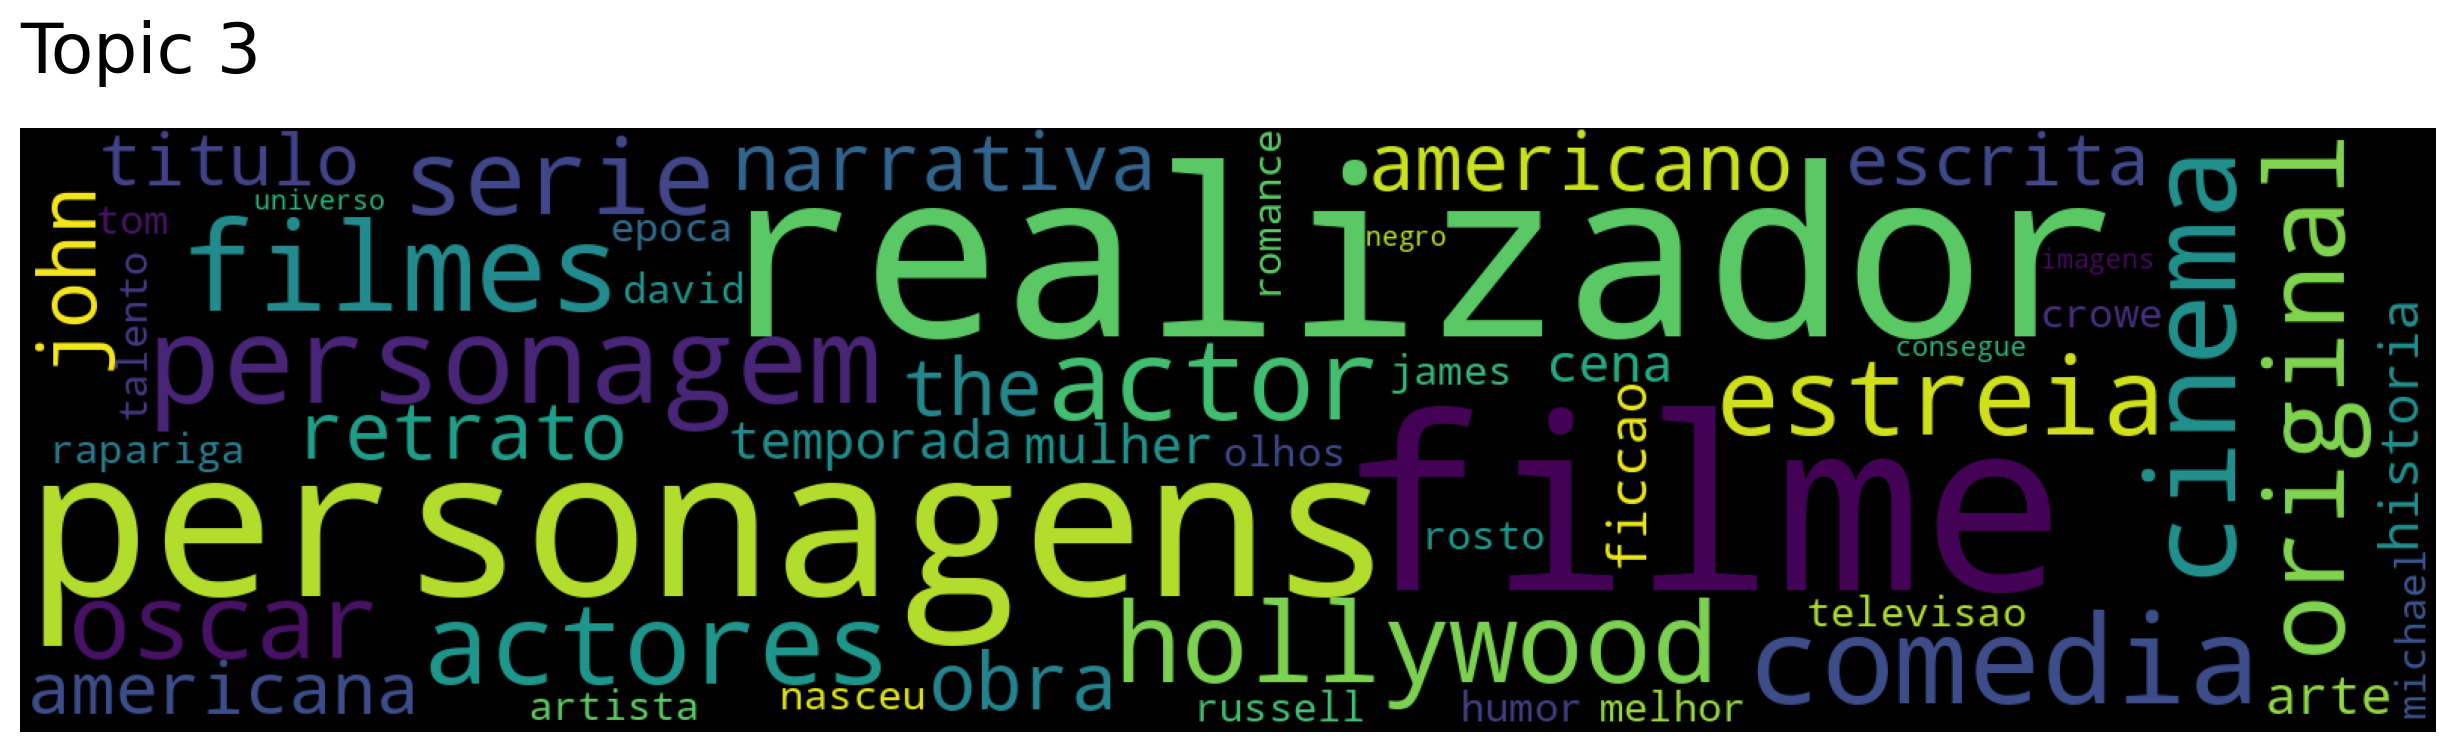

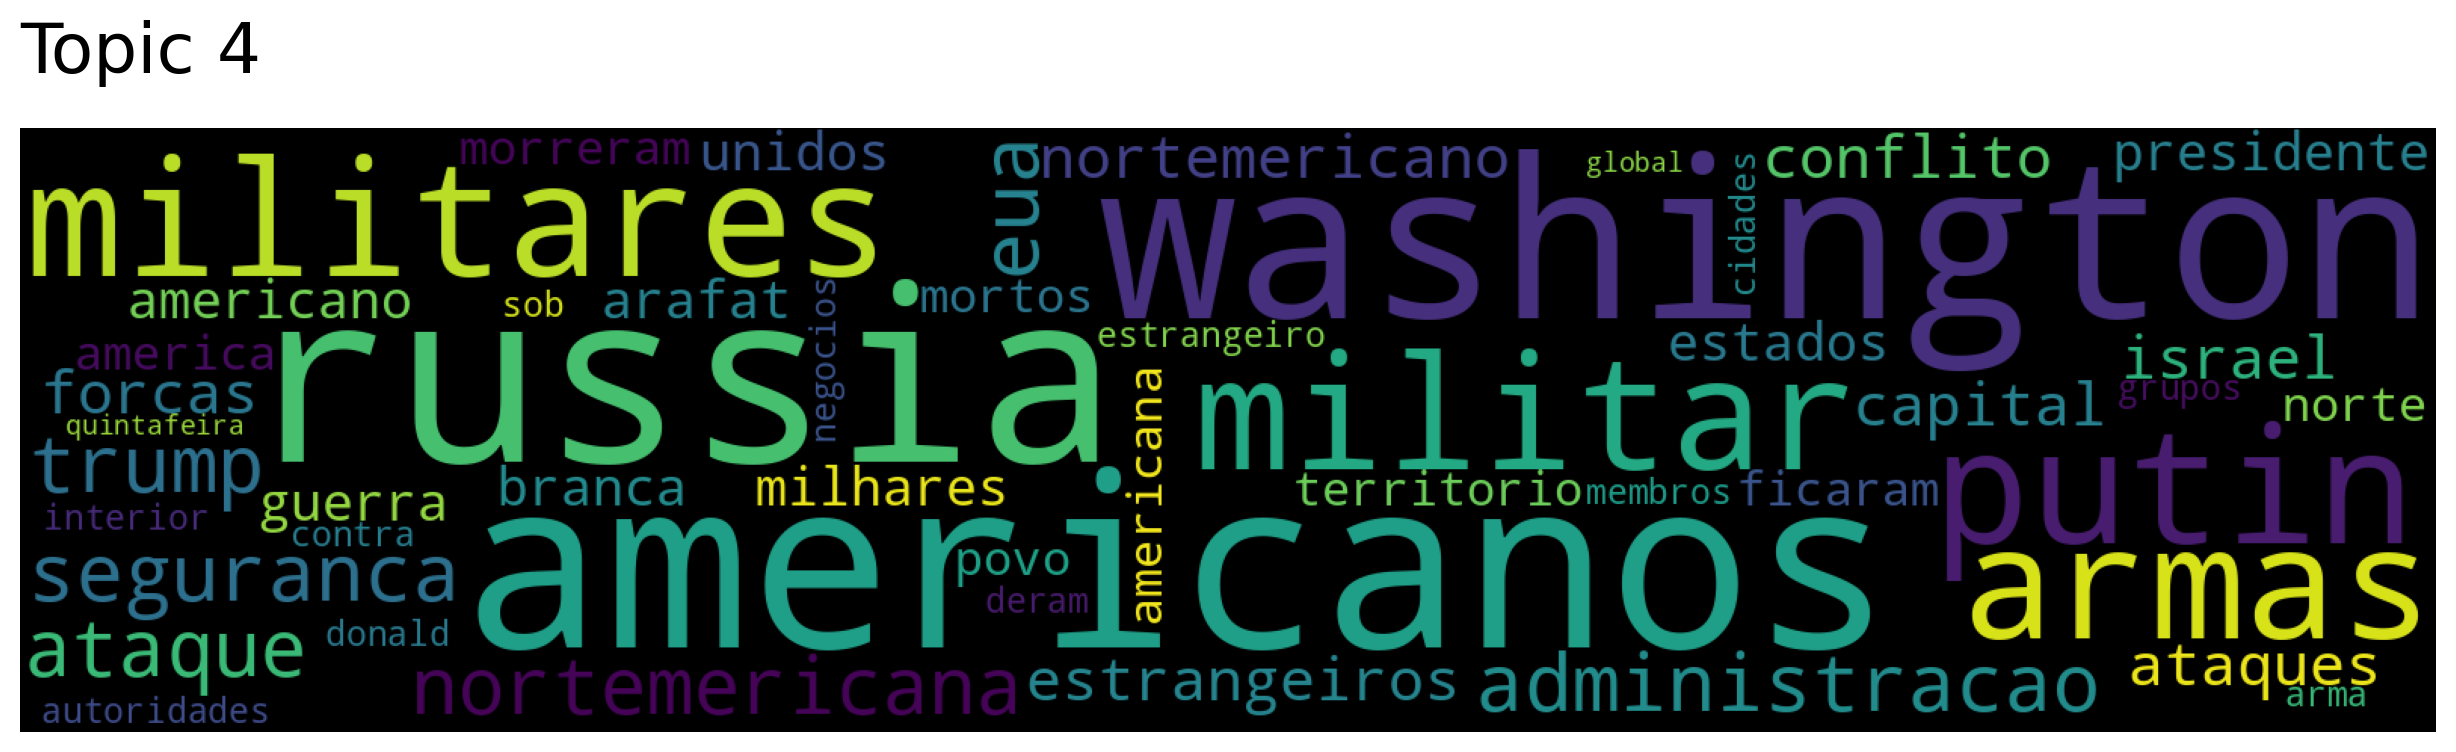

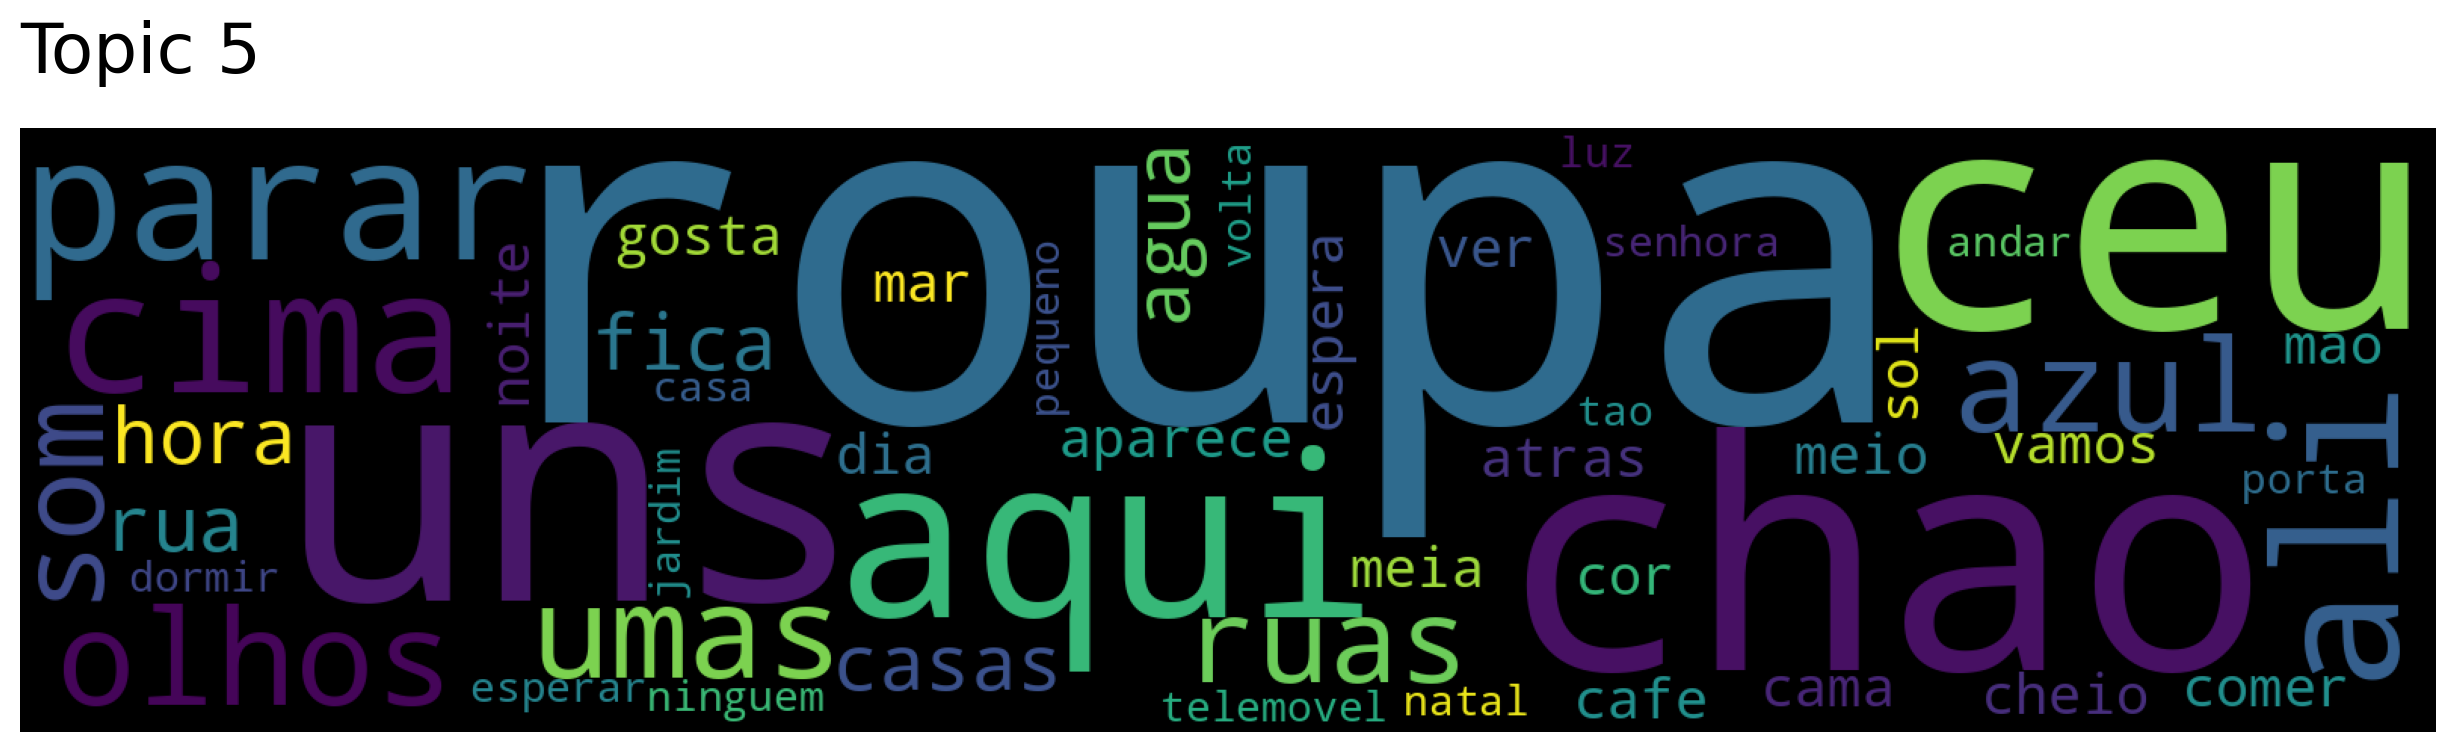

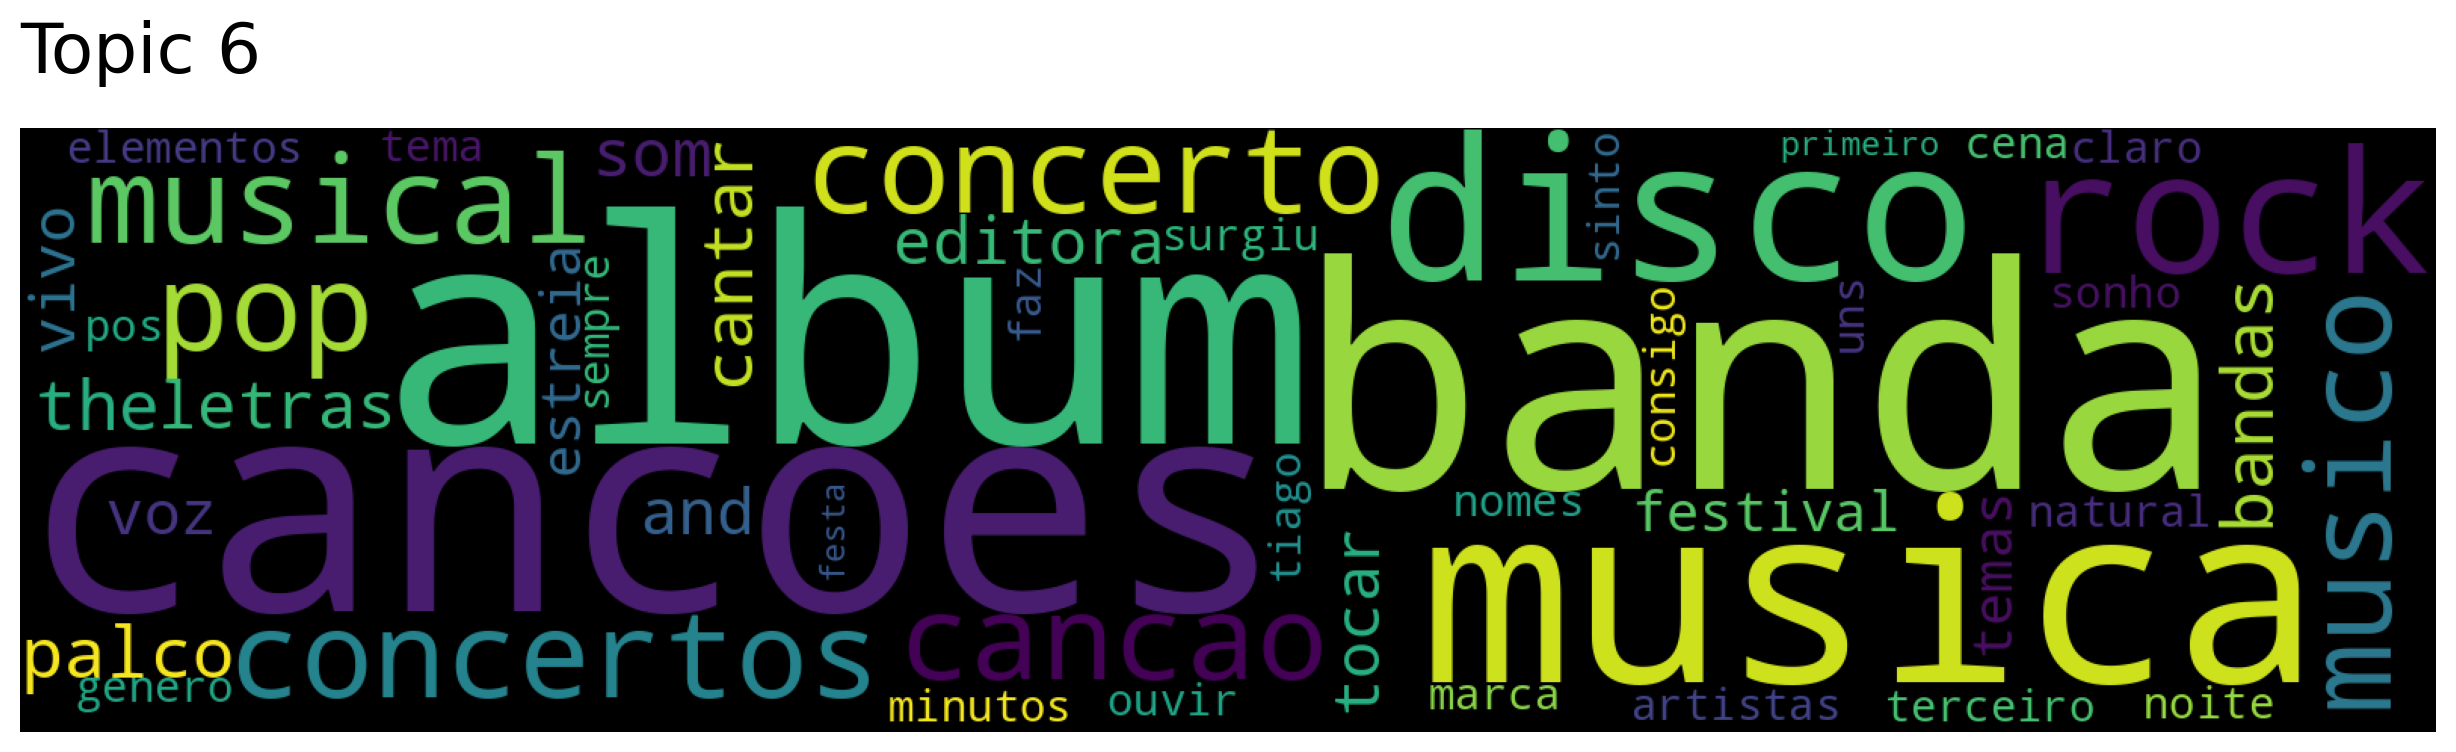

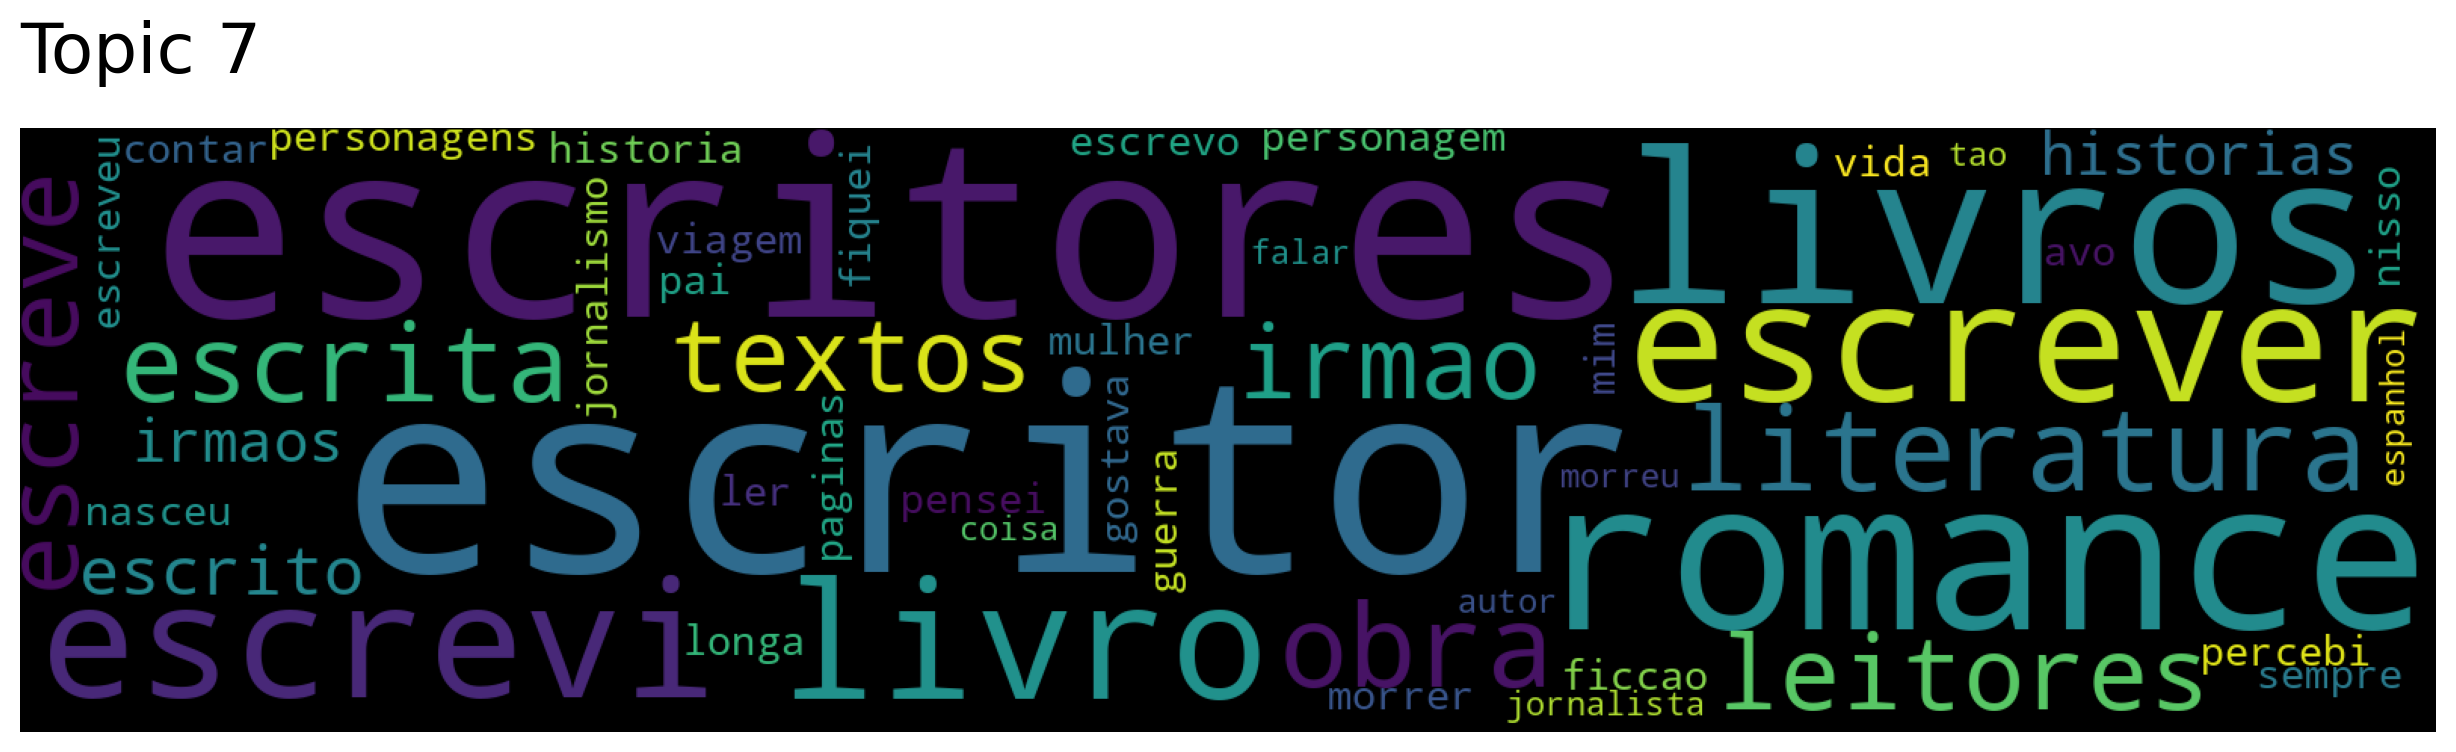

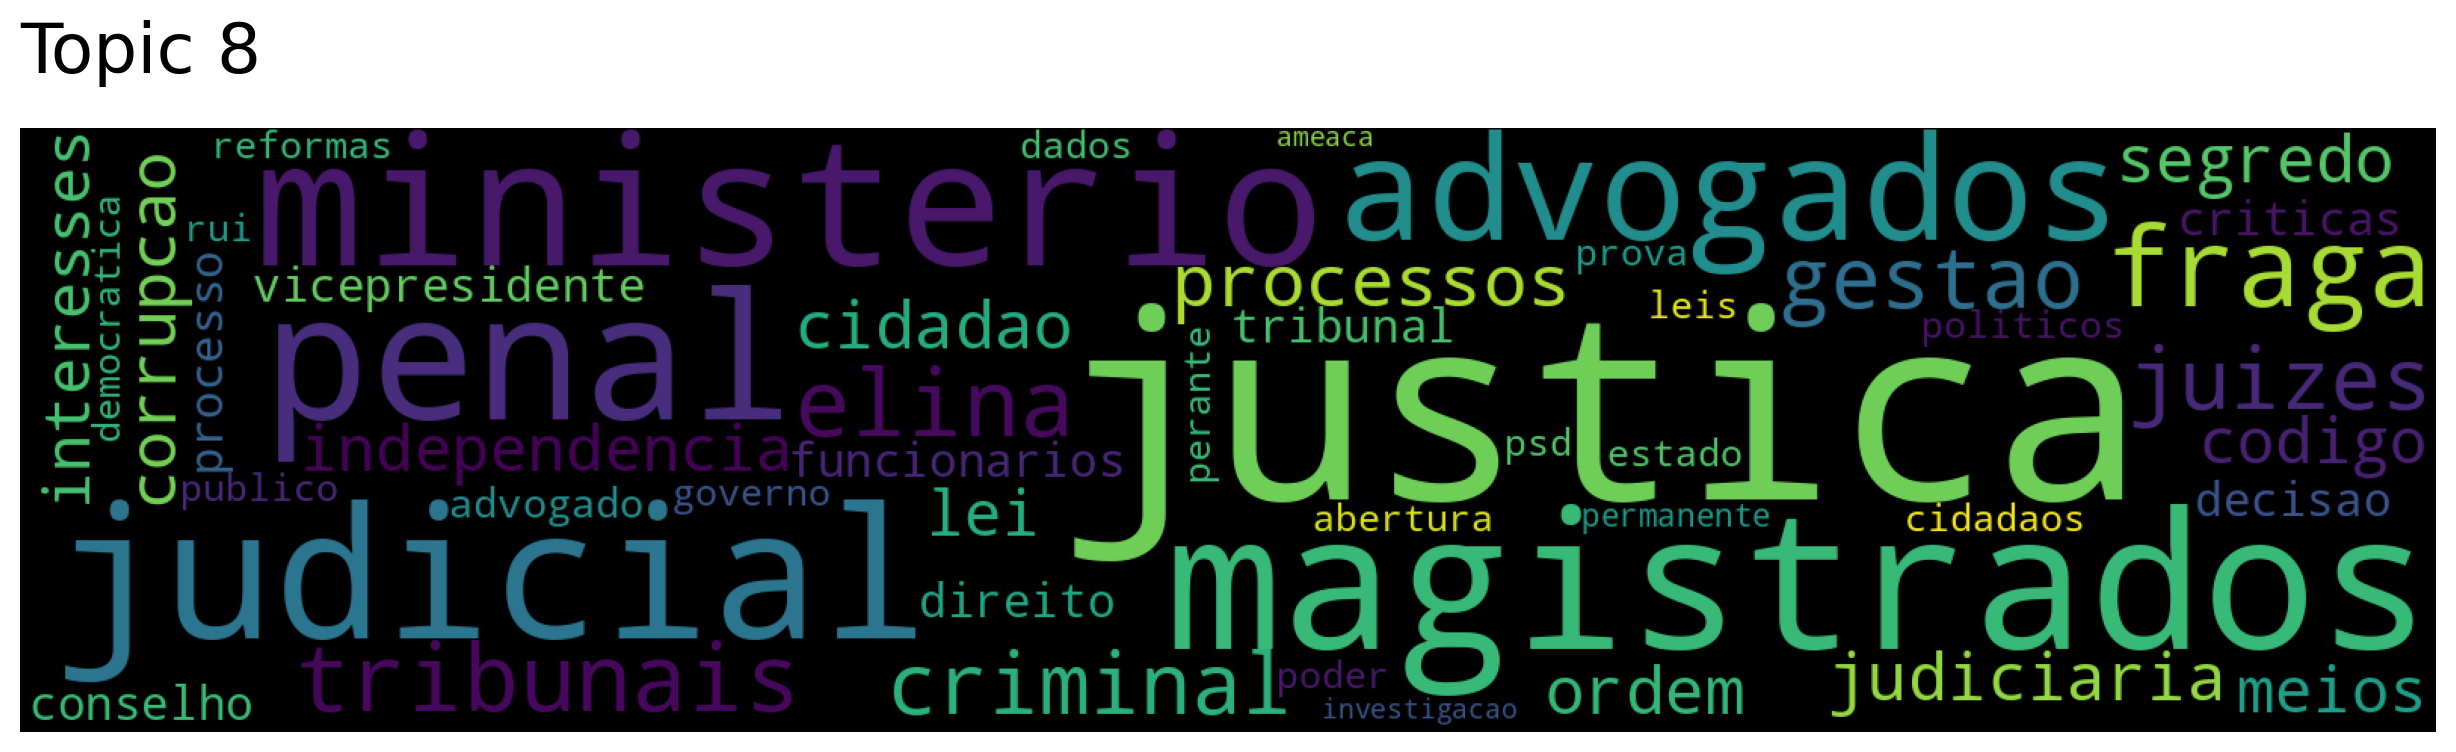

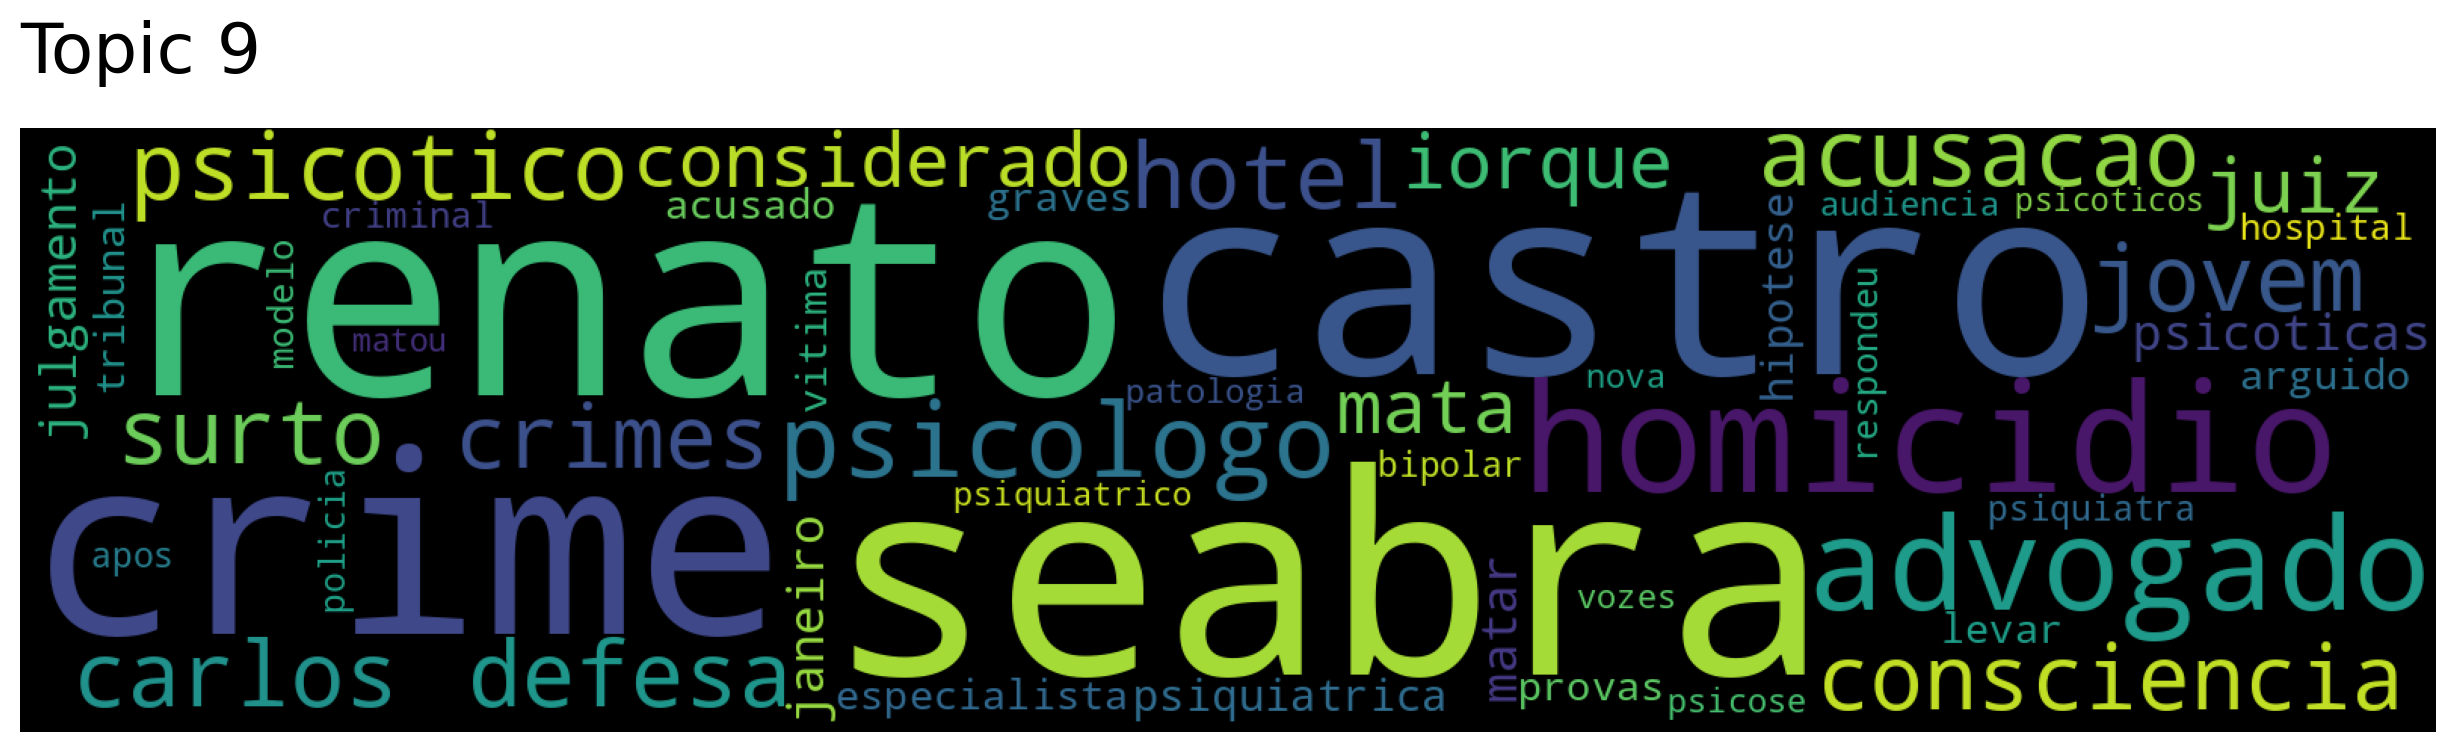

In [10]:
# Wordcloud for each topic

for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [11]:
# Number of documents in each topic

topic_sizes, topic_nums = model.get_topic_sizes()
for i in topic_nums:
  print("Topic "+str(i)+" has "+str(topic_sizes[i])+" documents.")

Topic 0 has 233 documents.
Topic 1 has 179 documents.
Topic 2 has 131 documents.
Topic 3 has 107 documents.
Topic 4 has 72 documents.
Topic 5 has 70 documents.
Topic 6 has 65 documents.
Topic 7 has 63 documents.
Topic 8 has 38 documents.
Topic 9 has 20 documents.


In [12]:
# Search documents by topic. Ordered by (decreasing) similarity.
# Note: in every execution of this notebook, the topics retrieved may be slightly different. Adapt this part to your results.

# Topic 0
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=0, num_docs=topic_sizes[0])
documents_topic0 = []
for index in document_indexes:
  documents_topic0.append(ids.get(index))

# Topic 1
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=1, num_docs=topic_sizes[1])
documents_topic1 = []
for index in document_indexes:
  documents_topic1.append(ids.get(index))

documents_topic1

# Topic 2
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=2, num_docs=topic_sizes[2])
documents_topic2 = []
for index in document_indexes:
  documents_topic2.append(ids.get(index))

# Topic 3
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=3, num_docs=topic_sizes[3])
documents_topic3 = []
for index in document_indexes:
  documents_topic3.append(ids.get(index))

# Topic 4
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=4, num_docs=topic_sizes[4])
documents_topic4 = []
for index in document_indexes:
  documents_topic4.append(ids.get(index))

# Topic 5
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=5, num_docs=topic_sizes[5])
documents_topic5 = []
for index in document_indexes:
  documents_topic5.append(ids.get(index))

# Topic 6
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=6, num_docs=topic_sizes[6])
documents_topic6 = []
for index in document_indexes:
  documents_topic6.append(ids.get(index))

# Topic 7
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=7, num_docs=topic_sizes[7])
documents_topic7 = []
for index in document_indexes:
  documents_topic7.append(ids.get(index))

# Topic 8
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=8, num_docs=topic_sizes[8])
documents_topic8 = []
for index in document_indexes:
  documents_topic8.append(ids.get(index))

# Topic 9
documents, document_scores, document_indexes = model.search_documents_by_topic(topic_num=9, num_docs=topic_sizes[9])
documents_topic9 = []
for index in document_indexes:
  documents_topic9.append(ids.get(index))

In [13]:
# Add topics to Visualization and Analysis file 
# Note: in every execution of this notebook, the topics retrieved may be slightly different. Adapt this part to your results.

parent = os.path.dirname(os.getcwd())

data_va = pd.read_pickle(parent+'/4.visualization and analysis/data_preprocessed_va.pkl')
data_va.head()

data_va.insert(10, 'topic', "")

def add_topics(id):

    topic = " "
     
    if id in documents_topic0:
      topic = "Saúde"
    elif id in documents_topic1:
      topic = "Crime"
    elif id in documents_topic2:
      topic = "Cinema"
    elif id in documents_topic3:
      topic = "Economia"
    elif id in documents_topic4:
      topic = "Conflitos militares"
    elif id in documents_topic5:
      topic = "Política"
    elif id in documents_topic6:
      topic = "Literatura"
    elif id in documents_topic7:
      topic = "Música"
    elif id in documents_topic8:
      topic = "Desporto"
    elif id in documents_topic9:
      topic = "Justiça"

    return topic
    
data_va["topic"] = data_va.ID.apply(lambda x: add_topics(x))
data_va.head()

data_va.to_pickle(parent+"/4.visualization and analysis/data_preprocessed_va.pkl")


ID           label     journal journalTitle  \
0   0         literal  publico.pt      Público   
1   1         literal  publico.pt      Público   
2   2  estigmatizante  publico.pt      Público   
3   3         literal  publico.pt      Público   
4   4         literal  publico.pt      Público   

                                             content  \
0  dia janeiro jared loughner tentou matar sucess...   
1  john nash matemático nobel economia retratado ...   
2  cavaco sairá desta campanha pior entrou casos ...   
3  cientista senadora italiana rita levintalcini ...   
4  ninguém sabe fazer ninguém sabe pensa come sob...   

                               authors publishDate archiveDate  year  \
0                                   []        None  2012-12-30  2012   
1                                   []        None  2016-01-17  2016   
2  ['Nuno Ferreira Santos', 'Arquivo']        None  2011-01-21  2011   
3                     ['Clara Barata']        None  2013-01-17  2013   
4                                   []        None  2015-04-20  2015   

                                       linkToArchive     topic  
0  https://arquivo.pt/wayback/20121230181331/http...    Cinema  
1  https://arquivo.pt/wayback/20160117223452/http...  Economia  
2  https://arquivo.pt/wayback/20110121142608/http...     Crime  
3  https://arquivo.pt/wayback/20130117170513/http...    Música  
4  https://arquivo.pt/wayback/20150420143056/http...    Cinema

## 4.5 With Latent Dirichlet Allocation (LDA) <a class="anchor" id="section_4_5"></a>

In [5]:
# Generate document-terms matrix

content_words = [doc.split() for doc in content]

dictionary = corpora.Dictionary(content_words)

doc_term_matrix = [dictionary.doc2bow(text) for text in content_words]

In [6]:
# Create model, with 6 topics to be found

lda_model = LdaMulticore(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=42)

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))

coherence_model_lda = CoherenceModel(model=lda_model, texts=content_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence: ', coherence_lda)


Perplexity:  -9.57550153394648

Coherence:  0.2637783788175124


In [7]:
# Print topics found

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)

print(lda_model.print_topics())

/home/alina/anaconda3/envs/stigma/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/alina/anaconda3/envs/stigma/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/alina/anaconda3/envs/stigma/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/alina/anaconda3/envs/stigma/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/alina/a

[(0, '0.007*"ser" + 0.004*"anos" + 0.003*"pessoas" + 0.003*"sobre" + 0.003*"ter" + 0.003*"porque" + 0.002*"fazer" + 0.002*"vida" + 0.002*"pode" + 0.002*"portugal"'), (1, '0.005*"ser" + 0.004*"anos" + 0.004*"ter" + 0.003*"porque" + 0.003*"sobre" + 0.003*"pessoas" + 0.003*"ainda" + 0.002*"fazer" + 0.002*"vida" + 0.002*"pode"'), (2, '0.005*"ser" + 0.004*"anos" + 0.003*"sobre" + 0.003*"ainda" + 0.003*"ter" + 0.003*"porque" + 0.003*"fazer" + 0.003*"todos" + 0.003*"pessoas" + 0.002*"sempre"'), (3, '0.007*"ser" + 0.004*"anos" + 0.004*"sobre" + 0.004*"ter" + 0.003*"porque" + 0.003*"ainda" + 0.003*"sempre" + 0.002*"pessoas" + 0.002*"fazer" + 0.002*"todos"'), (4, '0.005*"anos" + 0.004*"ser" + 0.003*"ter" + 0.003*"ainda" + 0.003*"pessoas" + 0.003*"porque" + 0.003*"fazer" + 0.003*"sobre" + 0.002*"onde" + 0.002*"pode"')]


In [8]:
# Visualize topics found

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.004621  0.004029       1        1  29.080225
4     -0.002022  0.004085       2        1  26.163054
3      0.005953 -0.005460       3        1  24.716163
1     -0.002359  0.001489       4        1  10.712909
2     -0.006193 -0.004143       5        1   9.327648, topic_info=          Term         Freq        Total Category  logprob  loglift
130        ser  3065.000000  3065.000000  Default  30.0000  30.0000
6         anos  2264.000000  2264.000000  Default  29.0000  29.0000
391      ainda  1442.000000  1442.000000  Default  28.0000  28.0000
141        ter  1702.000000  1702.000000  Default  27.0000  27.0000
239      sobre  1663.000000  1663.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1800      tudo    82.223603  1043.410433   Topic5  -6.3728  -0.1686
1151     forma    71.942110   821.907348   Topic5  -6.5064  -0.0636
1437     parte    68.403262   780.422463   Topic5  -6.5568  -0.0622
55      estado    65.702592   754.777590   Topic5  -6.5971  -0.0691
2183  portugal    65.740581   913.213353   Topic5  -6.5965  -0.2591

[447 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
49373      1  0.189466  abortiva
49373      2  0.189466  abortiva
49373      4  0.378932  abortiva
2          1  0.294528     agora
2          2  0.268295     agora
...      ...       ...       ...
4128       1  0.434238   últimos
4128       2  0.215163   últimos
4128       3  0.199515   últimos
4128       4  0.074329   últimos
4128       5  0.074329   últimos

[1052 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])